In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from datetime import timedelta
import pandas as pd
import io

In [ ]:
file_path = "cafethai_prices.csv"
df = pd.read_csv(file_path)
df.head()

,date,time,cash_type,coffee_name,money
0,1/3/2023,08:04:19,card,Latte,75
1,1/3/2023,08:08:54,cash,Americano with Milk,70
2,1/3/2023,08:09:03,card,Cappuccino,75
3,1/3/2023,08:10:26,cash,Cappuccino,75
4,1/3/2023,08:15:37,cash,Cappuccino,75


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['day'] = df['date'].dt.date

In [ ]:
daily_sales = df.groupby(['day', 'coffee_name']).size().reset_index(name='cups_sold')

In [ ]:
average_daily_sales = daily_sales.groupby('coffee_name')['cups_sold'].mean().reset_index()
average_daily_sales.rename(columns={'cups_sold': 'average_cups_per_day'}, inplace=True)

In [ ]:
forecast_days = 60
average_daily_sales['forecasted_cups_60_days'] = average_daily_sales['average_cups_per_day'] * forecast_days

In [ ]:
print("การคาดการณ์ยอดขายต่อวันแต่ละเมนู:")
print(average_daily_sales[['coffee_name', 'average_cups_per_day']])
print("-" * 50)

การคาดการณ์ยอดขายต่อวันสำหรับแต่ละเมนู:
           coffee_name  average_cups_per_day
0            Americano             13.698734
1  Americano with Milk             19.158028
2           Cappuccino             12.381378
3                Cocoa              5.854139
4              Cortado              7.020699
5             Espresso              3.698592
6        Hot Chocolate              6.977951
7                Latte             18.695322
--------------------------------------------------


In [ ]:
print("การคาดการณ์ยอดขายรวมใน 60 วันข้างหน้าแต่ละเมนู:")
print(average_daily_sales[['coffee_name', 'forecasted_cups_60_days']])
print("-" * 50)

การคาดการณ์ยอดขายรวมใน 60 วันข้างหน้าสำหรับแต่ละเมนู:
           coffee_name  forecasted_cups_60_days
0            Americano               821.924051
1  Americano with Milk              1149.481669
2           Cappuccino               742.882653
3                Cocoa               351.248357
4              Cortado               421.241915
5             Espresso               221.915493
6        Hot Chocolate               418.677043
7                Latte              1121.719343
--------------------------------------------------


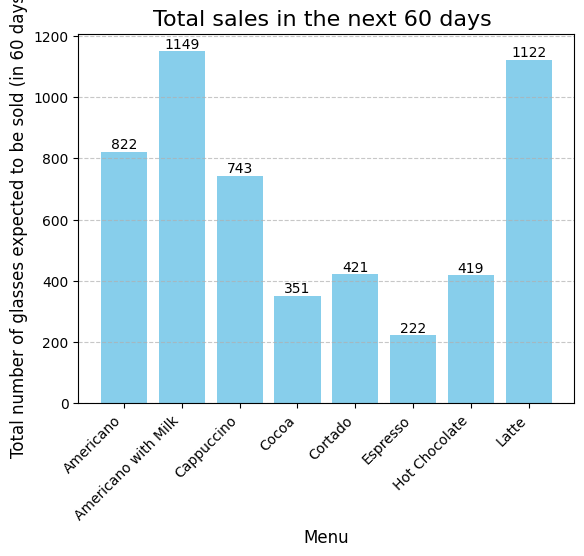

In [ ]:
# สร้างกราฟ
plt.bar(average_daily_sales['coffee_name'], average_daily_sales['forecasted_cups_60_days'], color='skyblue')

plt.title('Total sales in the next 60 days ', fontsize=16)
plt.xlabel('Menu', fontsize=12)
plt.ylabel('Total number of glasses expected to be sold (in 60 days))', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


for index, value in enumerate(average_daily_sales['forecasted_cups_60_days']):
    plt.text(index, value + 0.5, f'{value:.0f}', ha='center', va='bottom')

plt.show()